## INTRODUCTION

* Seaborn is a powerful Python visualization library built on top of Matplotlib, providing a high-level interface for drawing attractive and informative statistical graphics.
  
* Seaborn simplifies the process of creating complex visualizations and is particularly well-suited for visualizing data with relationships, distributions, and categories.
  
* And integrates with the functionality provided by Pandas DataFrames.

## Tips Dataset
The Tips dataset contains information about tips received by waitstaff in a restaurant.
### Features and Characteristics

* total_bill: Total bill amount (numerical)

* tip: Tip amount (numerical)

* sex: Gender of the person paying the bill (categorical)

* smoker: Whether the person is a smoker (categorical)

* day: Day of the week (categorical)

* time: Time of day (Lunch/Dinner) (categorical)

* size: Size of the party (numerical)

In [112]:
## importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [113]:
## loading dataset( Load the built-in 'tips' dataset)
df=sns.load_dataset('tips')

In [114]:
## run all the data
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [115]:
## get information about a dataset (dtype, non-null values, memory usage)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [116]:
df.duplicated().sum()

1

In [117]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [118]:
## detect missing values
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

### Information of the dataset
* The tips dataset has 7 columns (features) and 244 rows (observations,samples).

* Numerical columns are:

1.total_bill (float) - the amount of the total bill

2.tip (float) - the amount of the tip paid on the bill

3.size (int) - the number of total people served

* Categorical columns are:

1.sex (Male/Female) - the gender of the person who paid the bill

2.smoker (Yes/No) - whether or not the person who paid the bill is a smoker

3.day (Thur/Fri/Sat/Sun) - the day when the person paid the bill

4.time (Lunch/Dinner) - the time of the day i.e. lunch or dinner

* There is no missing values

In [119]:
## statistics summery
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,243.0,19.813868,8.910071,3.07,13.38,17.81,24.175,50.81
tip,243.0,3.002387,1.385002,1.00,2.00,2.92,3.575,10.00
size,243.0,2.572016,0.952356,1.00,2.00,2.00,3.000,6.00


In [120]:
##  get column names
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

## Count plot

* Displays the count of observations in each categorical bin.
* Similar to a bar plot, but specifically counts the occurrences of each category. Useful for categorical data analysis.

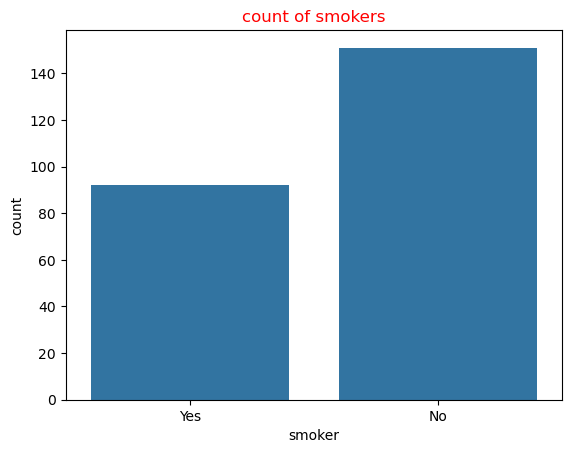

In [121]:
sns.countplot(x='smoker',data=df)
plt.title("count of smokers",color='red')
plt.show()

* more non-smokers than smokers

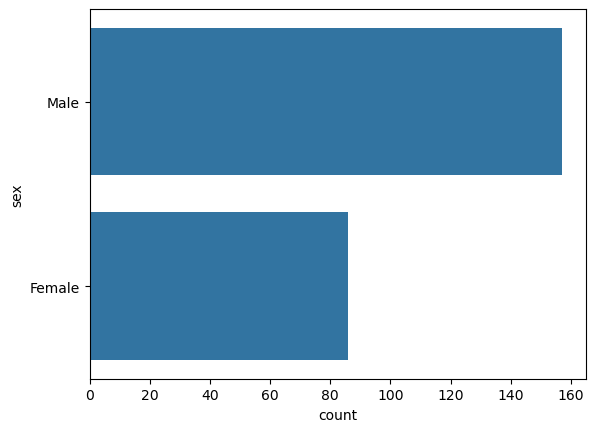

In [122]:
sns.countplot(y='sex',data=df)
plt.show()

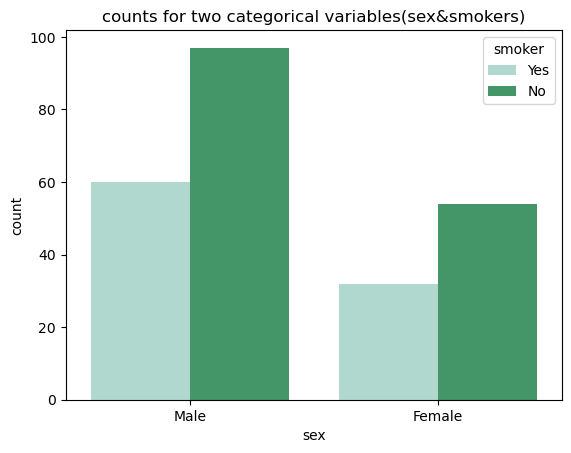

In [123]:
### show value counts for two categorical variables

sns.countplot(x='sex', data=df, hue='smoker', palette='BuGn')
plt.title("counts for two categorical variables(sex&smokers)");

* More males than females appear in the dataset.
* Both males and females have more non-smokers than smokers.
* Among smokers, there are more male smokers than female smokers.
* Similarly, more males are non-smokers compared to females.

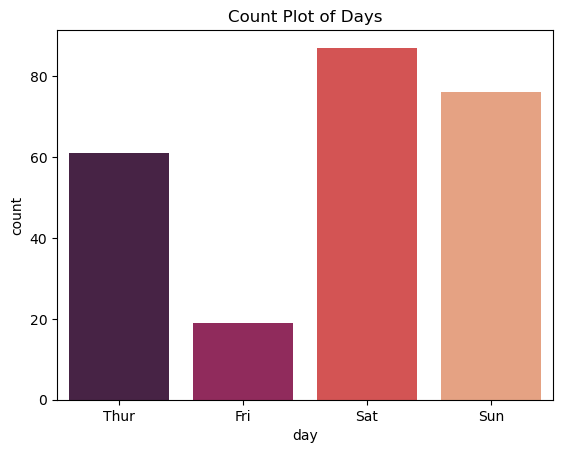

In [177]:
# Create count plot
sns.countplot(x='day', data=df,palette="rocket")
plt.title("Count Plot of Days")
plt.show()

## Bar plot
* Compares the average value of a numerical variable across different categories.
* The height of each bar represents the mean value of the numerical variable for each category on the x-axis.

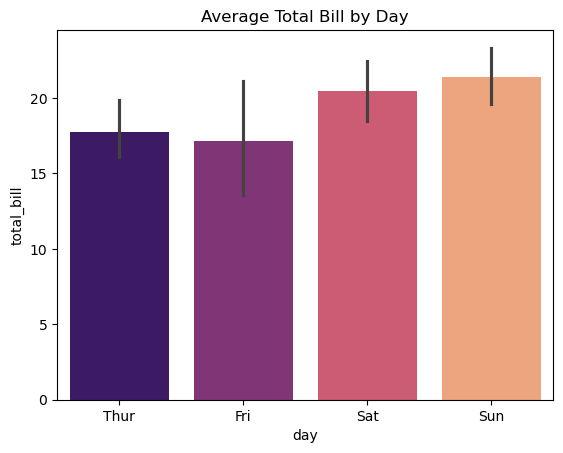

In [161]:
sns.barplot(x='day', y='total_bill', data=df, estimator=np.mean,palette="magma")
plt.title("Average Total Bill by Day")
plt.show()

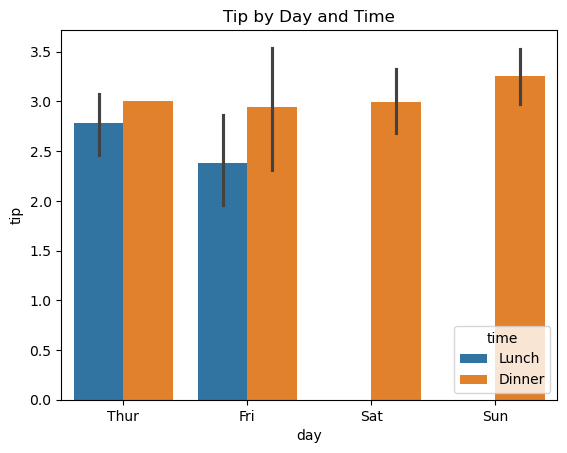

In [124]:
sns.barplot(x='day', y='tip',data=df,hue="time")
plt.title("Tip by Day and Time")
plt.show()

* tips are generally higher during dinner compared to lunch, with Sunday dinners receiving the highest tips.

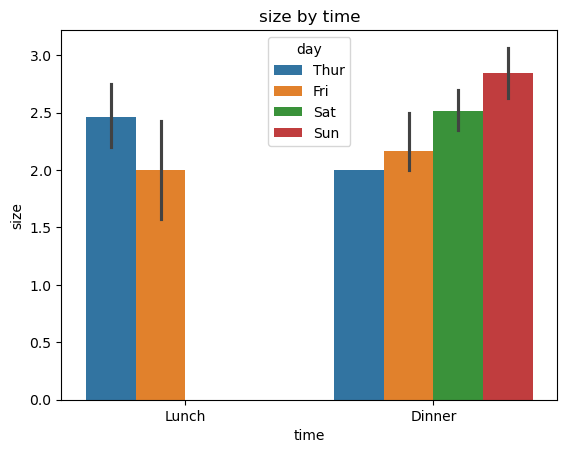

In [162]:
sns.barplot(x='time', y='size',hue='day' ,data=df)
plt.title("size by time")
plt.show()

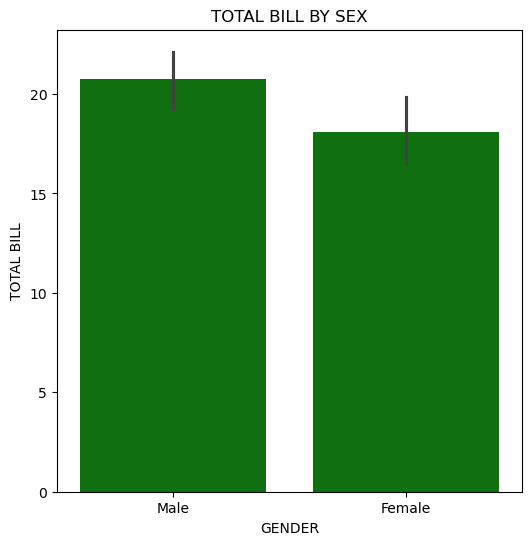

In [125]:
plt.figure(figsize=(6,6))
sns.barplot(x=df['sex'],y=df['total_bill'],color='g')
plt.title("TOTAL BILL BY SEX")
plt.xlabel("GENDER")
plt.ylabel("TOTAL BILL")
plt.show()

* The total bill from male customers is significantly larger than that from female customers.

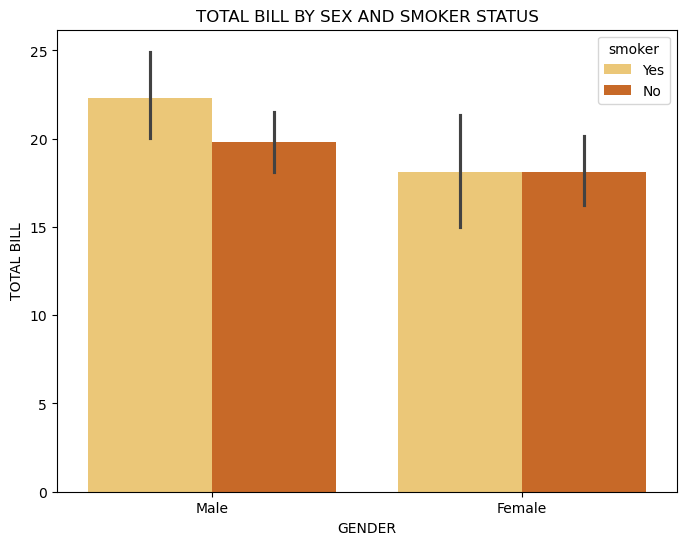

In [126]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['sex'],y=df['total_bill'],hue=df['smoker'],palette="YlOrBr")
plt.title("TOTAL BILL BY SEX AND SMOKER STATUS")
plt.xlabel("GENDER")
plt.ylabel("TOTAL BILL")
plt.show()

* Males tend to spend more than females.
* Among males, smokers spend slightly more than non-smokers.
* For females, smokers and non-smokers spend about the same.

## Scatter plot

* Displays the relationship between two continuous variables.
* Each point represents an observation in the data. Scatter plots are useful for identifying trends, clusters, or outliers.

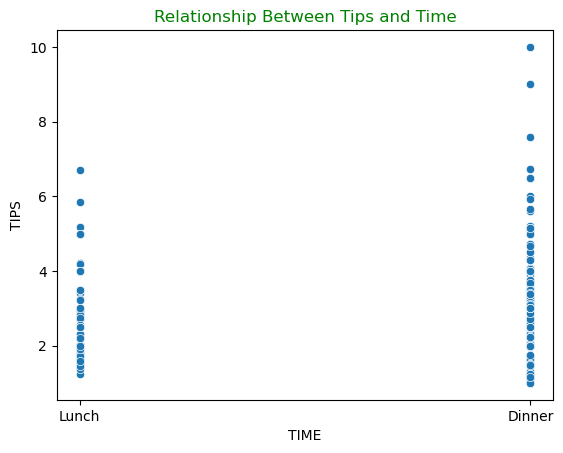

In [127]:
sns.scatterplot(x="time",y="tip",data=df)
plt.title("Relationship Between Tips and Time",color="green")
plt.xlabel("TIME")
plt.ylabel("TIPS");

* tips are generally higher during dinner compared to lunch.

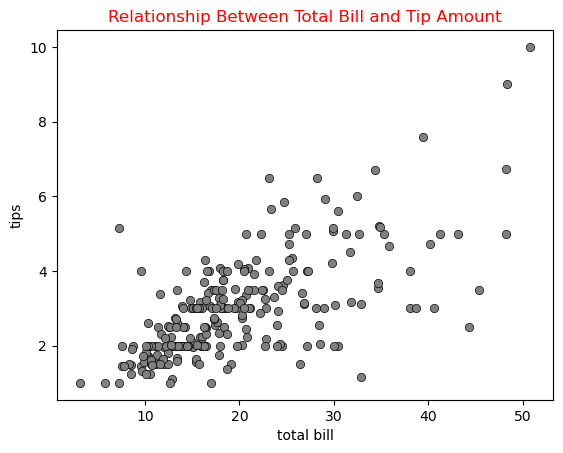

In [128]:
sns.scatterplot(x="total_bill",y="tip",data=df,color='grey',edgecolor="black")
plt.title("Relationship Between Total Bill and Tip Amount",color="red")
plt.xlabel("total bill")
plt.ylabel("tips");

* There is a positive correlation between the total bill and the tip amount. As the total bill increases, tips tend to increase as well.

* The scatter plot shows a general upward trend, meaning customers who spend more on their meals tend to leave larger tips.


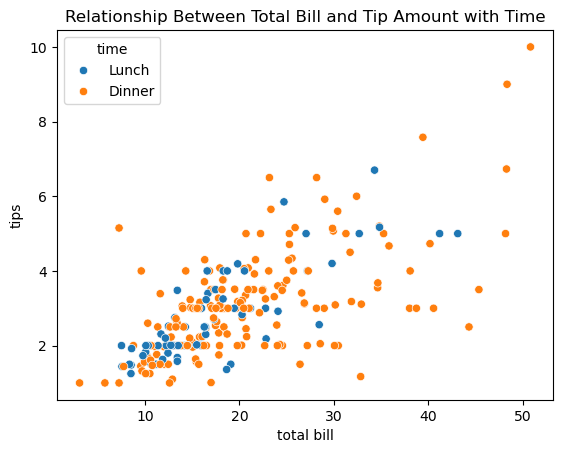

In [129]:
sns.scatterplot(x="total_bill",y="tip",hue="time",data=df)
plt.title("Relationship Between Total Bill and Tip Amount with Time")
plt.xlabel("total bill")
plt.ylabel("tips");

* The scatter plot shows the relationship between total bill and tip amounts, with the time of day
* Both Lunch and Dinner times follow a similar trend: as the total bill increases, the tip amount tends to increase.
* There are more data points for Dinner, suggesting more meals were served at dinner time than lunch.

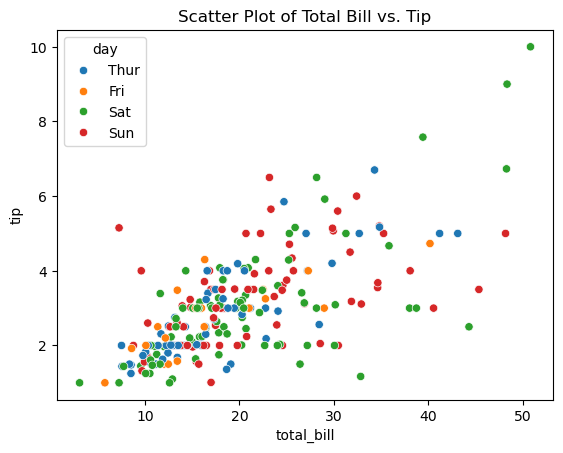

In [156]:
sns.scatterplot(x='total_bill', y='tip', data=df, hue='day')
plt.title("Scatter Plot of Total Bill vs. Tip")
plt.show()

## Pie plot

In [130]:
tips=df.groupby('day')['tip'].sum().reset_index()
tips

,day,tip
0,Thur,169.83
1,Fri,51.96
2,Sat,260.40
3,Sun,247.39


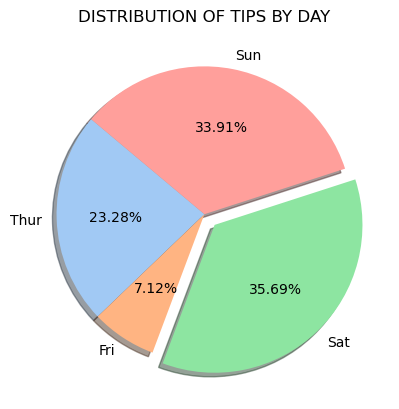

In [131]:
plt.pie(tips['tip'],labels=tips['day'],explode=(0,0,0.1,0),autopct="%1.2f%%",startangle=140, colors=sns.color_palette('pastel'),shadow=True)
plt.title("DISTRIBUTION OF TIPS BY DAY")
plt.show()

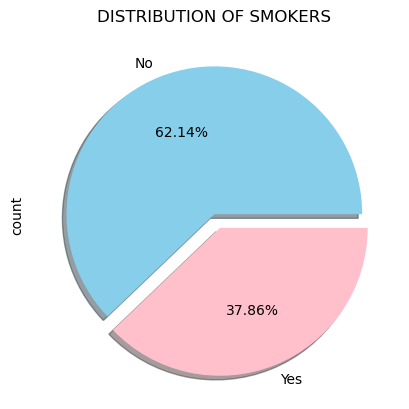

In [132]:
df["smoker"].value_counts().plot(kind='pie',title='DISTRIBUTION OF SMOKERS',explode=(0,0.1),autopct="%1.2f%%",shadow=True,colors=['skyblue', 'pink']);

* It shows that 61.89%  are non-smokers, while 38.11% are smokers.

In [133]:
tips['day'].nunique()

4

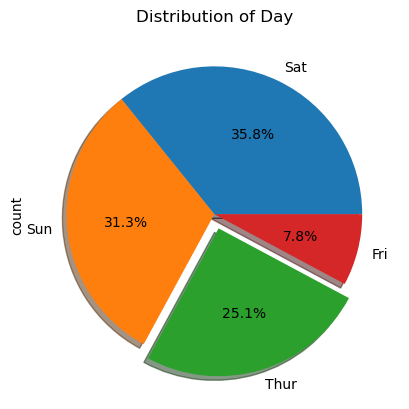

In [134]:
df['day'].value_counts().plot(kind='pie',explode=(0,0,0.1,0),shadow=True,autopct="%1.1f%%")
# Add a title
plt.title('Distribution of Day')

# Display the chart
plt.show()

## Hist plot

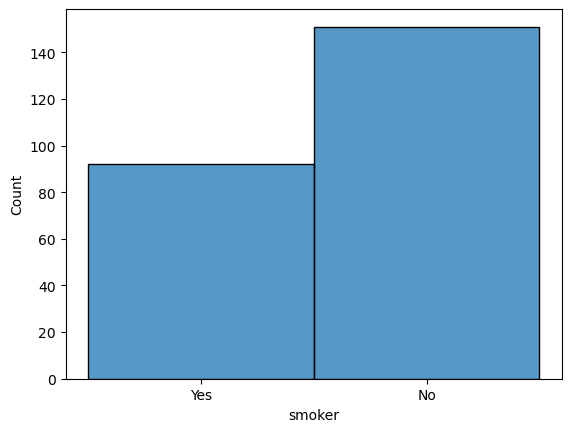

In [135]:
sns.histplot(x='smoker',data=df);

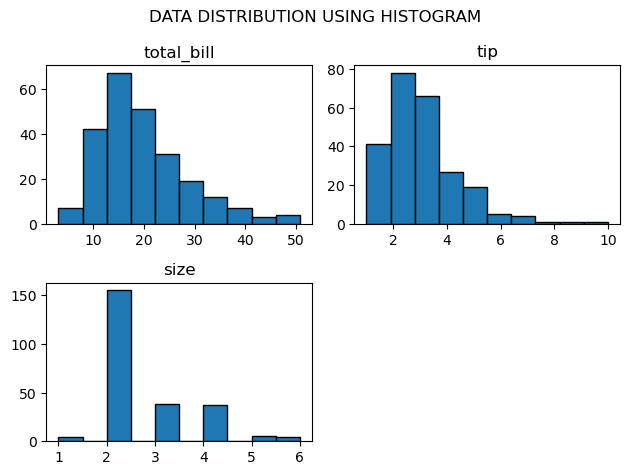

In [136]:
df.hist(grid=False,bins=10,edgecolor="black")
plt.suptitle("DATA DISTRIBUTION USING HISTOGRAM")
plt.tight_layout()
plt.show()

* Total Bill: Most bills are between 10 and 20.
* Tip: Tips are most frequently between 2 and 4.
* Size: Groups of size 2 are the most common.

## Boxplot

* Displays the distribution of a numerical variable across different categories.
*  Shows the median, quartiles, and potential outliers. It's useful for understanding the spread and skewness of data.

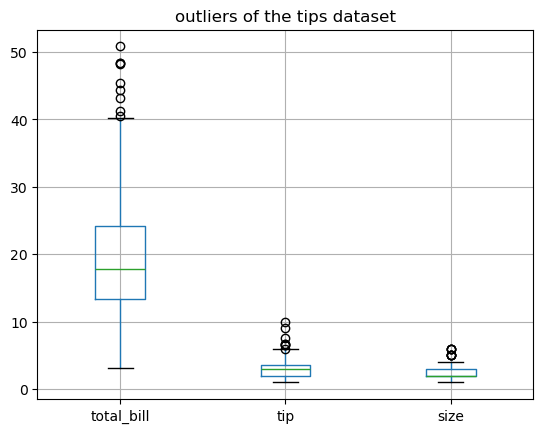

In [137]:
df.boxplot().set(title='outliers of the tips dataset') ;

* Total Bill: Some bills are significantly higher than the average.
* Tip: A few tips are exceptionally generous.
* Size: Occasionally, there are larger groups than usual.

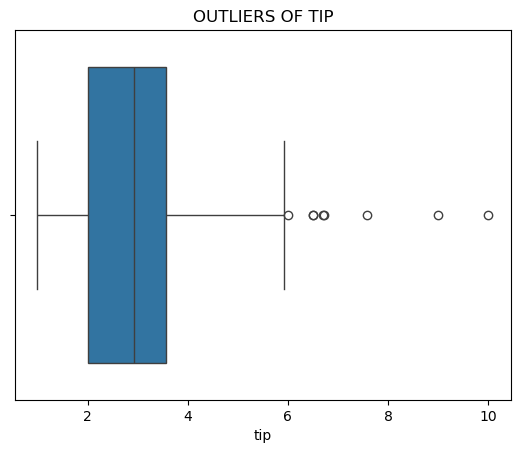

In [138]:
sns.boxplot(x='tip',data=df)
plt.title("OUTLIERS OF TIP")
plt.show()

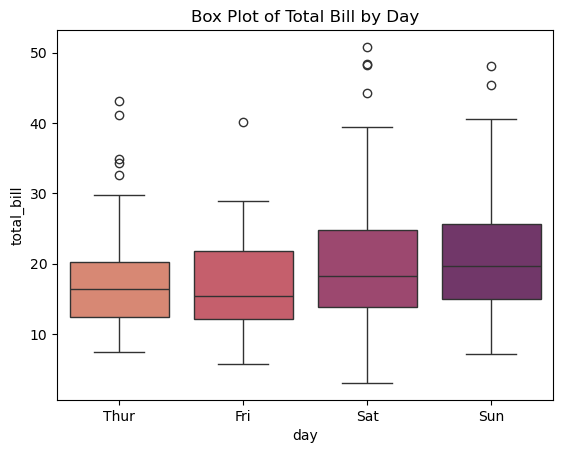

In [166]:
sns.boxplot(x='day', y='total_bill', data=df,palette="flare")
plt.title("Box Plot of Total Bill by Day")
plt.show()

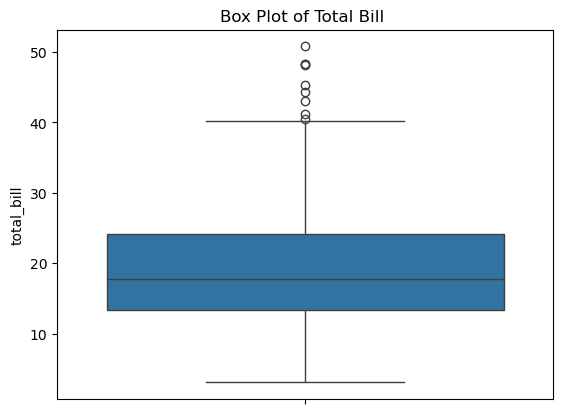

In [163]:
sns.boxplot( y='total_bill', data=df)
plt.title("Box Plot of Total Bill ")
plt.show()

## Violin plot

* Combines a box plot and a density plot to show the distribution of a numerical variable across categories.
*  Provides more information about the distribution of the data compared to a box plot, such as multimodal distributions ( It shows the median, quartiles, and outliers of the data, as well as the probability density function of the data.).

* The body of the violin plot shows the distribution of the data, with the median marked by a white dot. 
* The whiskers show the range of the data, excluding outliers. 
* Outliers are shown as individual points.

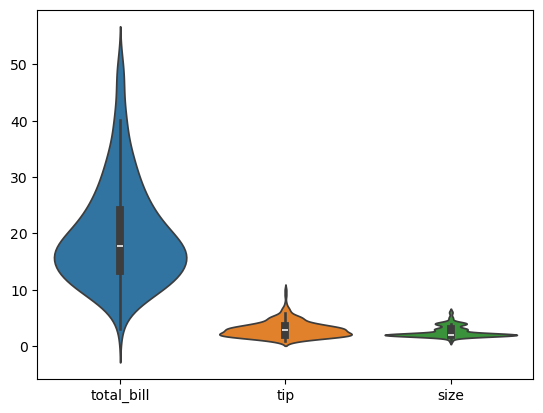

In [139]:
sns.violinplot(df);

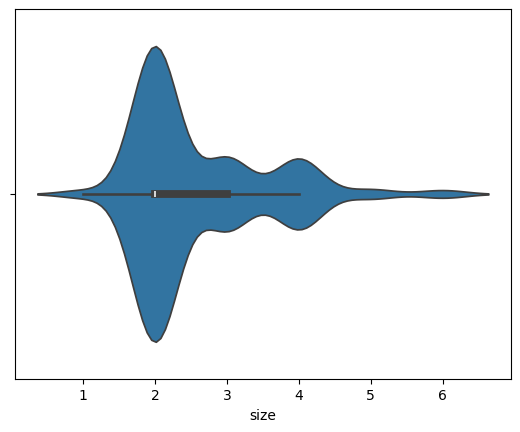

In [140]:
sns.violinplot(x="size",data=df);

* a distribution graph of ‘size’ with a central peak around 3, indicating that most parties are around this size.

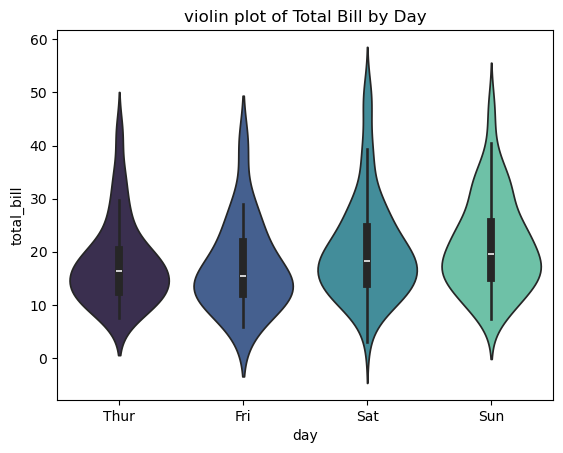

In [171]:
sns.violinplot(x='day', y='total_bill', data=df,palette="mako")
plt.title("violin plot of Total Bill by Day")
plt.show()

## Heatmap
#### Heatmap :Displays matrix data with color intensities representing values
* Use: Visualizes matrix-like data, often used to display correlations or tabular data with color encoding.
* Heatmap function expects numerical data,
* To create a heatmap, you need to prepare the data in a matrix format where both the rows and columns are categorical variables and the values are numerical
* Example: sns.heatmap(data, annot=True, cmap="YlGnBu")
* Explanation: Shows how data values vary across a grid. Colors represent different ranges of values, making it easy to spot patterns or outl
* annot=True: Adds the numerical values inside each cell.iers.

## Correlation Matrix:
* If you want to visualize the correlation between different numerical variables, you can use a correlation matrix.

In [141]:
## compute correlation matrix
numerical=df.select_dtypes(['int64','float64'])
numerical.corr()

,total_bill,tip,size
total_bill,1.000000,0.674998,0.597589
tip,0.674998,1.000000,0.488400
size,0.597589,0.488400,1.000000


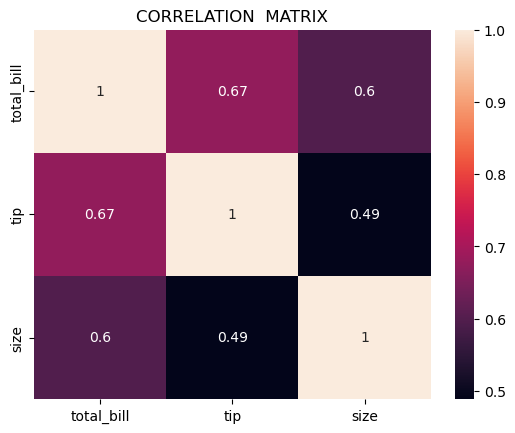

In [142]:
sns.heatmap(numerical.corr(),annot=True)
plt.title("CORRELATION  MATRIX");

* positive correlation (>1) among numerical variables
* the strongest relationship is between total_bill and tip (0.67)

In [143]:
# Pivot data for heatmap
data = df.pivot_table(index='day', columns='time', values='total_bill', aggfunc=np.mean)
data

time,Lunch,Dinner
day,,
Thur,17.742500,18.780000
Fri,12.845714,19.663333
Sat,NaN,20.441379
Sun,NaN,21.410000


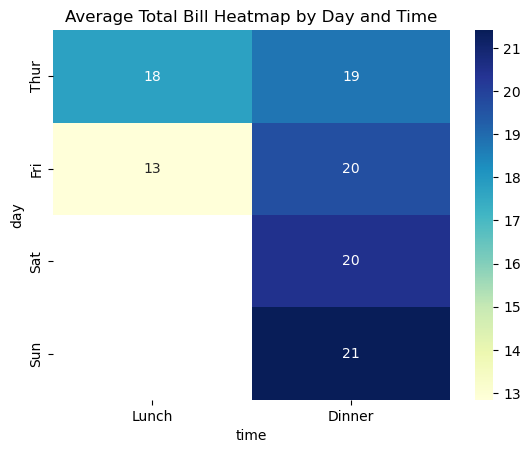

In [144]:
sns.heatmap(data,annot=True,cmap="YlGnBu")
plt.title("Average Total Bill Heatmap by Day and Time")
plt.show()

## Interpreting This Heatmap:

#### High and Low Values:

* Darker Colors: Represent higher average total_bill values.
* Lighter Colors: Represent lower average total_bill values.
* Different colors or shades represent different ranges of values. 
* For instance, darker colors might indicate higher values, while lighter colors represent lower values.
* By observing the color patterns, you can identify areas of high or low intensity in your data.
    
#### Patterns:

* You might observe that certain days (e.g., Sunday) have higher average total_bill compared to others (e.g., Tuesday).
* You might also see that the Dinner time has higher average bills compared to Lunch.

#### Comparisons:

* Day vs. Time: Comparing different days of the week, you can see which days have higher or lower average bills and how this varies with meal times.

#### Outliers and Anomalies:

* Highlight Outliers: Unusual values or anomalies in the dataset will stand out as different colors compared to the surrounding cells. For example, a significantly higher value in a heatmap can indicate an outlier or anomaly.

#### Distributions:

* Overall Distribution: Heatmaps can show the overall distribution of values in a matrix format. For example, a heatmap showing customer activity throughout a day and week can help you understand peak times and quieter periods.

* This information can be useful for business decisions, such as adjusting staffing levels or targeting promotions on specific days or times.

## Line plot

*  Shows the relationship between two continuous variables, with the points connected by lines.
* Often used to visualize time series data, where the x-axis typically represents time and the y-axis represents a quantitative measure.

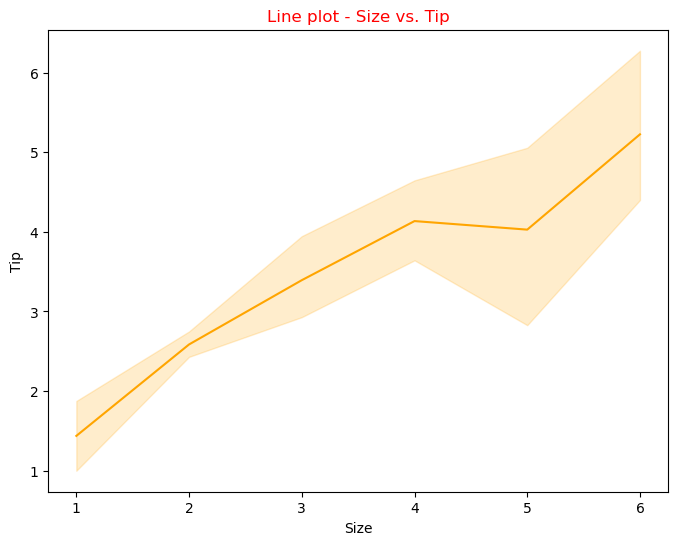

In [145]:
plt.figure(figsize=(8,6))
sns.lineplot(x='size', y='tip', data=df,color="orange")
plt.xlabel("Size")
plt.ylabel("Tip")
plt.title('Line plot - Size vs. Tip',color="red")
plt.show()

* It indicates that  size of the party increases, the tip amount generally tends to increase as well.

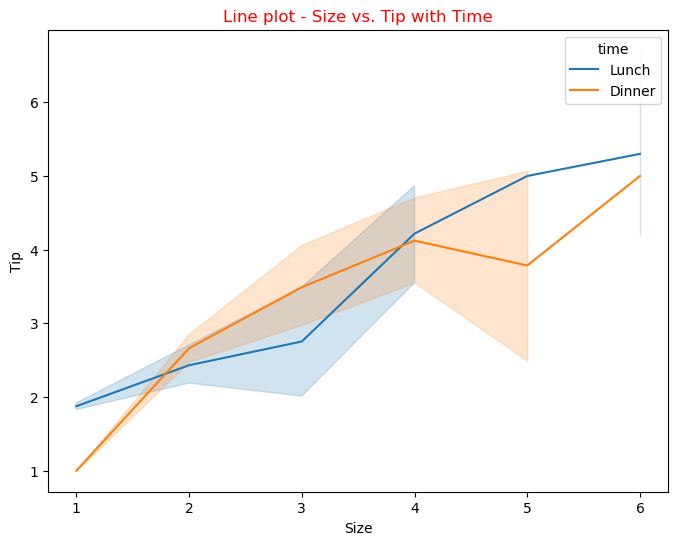

In [146]:
plt.figure(figsize=(8,6))
sns.lineplot(x='size', y='tip',hue="time" ,data=df)
plt.xlabel("Size")
plt.ylabel("Tip")
plt.title('Line plot - Size vs. Tip with Time',color="red")
plt.show()

* As the party size increases, tips tend to be higher for both lunch and dinner, with dinner generally receiving higher tips.

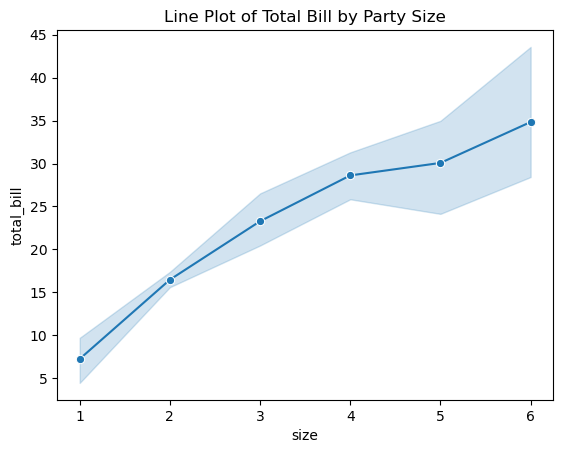

In [153]:
sns.lineplot(x='size', y='total_bill', data=df, marker='o')
plt.title("Line Plot of Total Bill by Party Size")
plt.show()

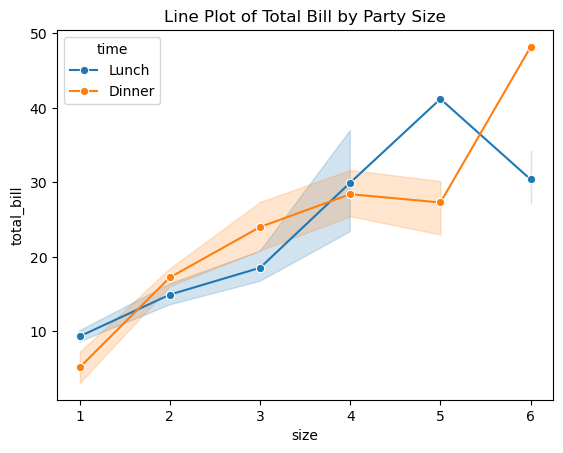

In [155]:
sns.lineplot(x='size', y='total_bill', data=df, hue='time', marker='o')
plt.title("Line Plot of Total Bill by Party Size")
plt.show()

## Pair plot

* Visualizes relationships between multiple pairs of variables in a dataset.
* Creates a grid of scatter plots and histograms to show pairwise relationships and distributions. Useful for exploring relationships in a dataset.


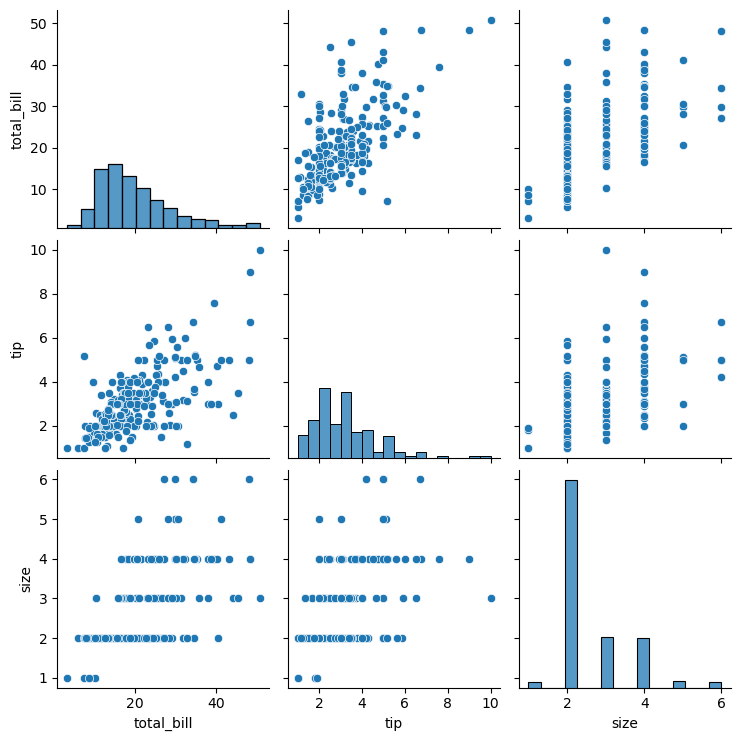

In [147]:
sns.pairplot(df)
plt.show()

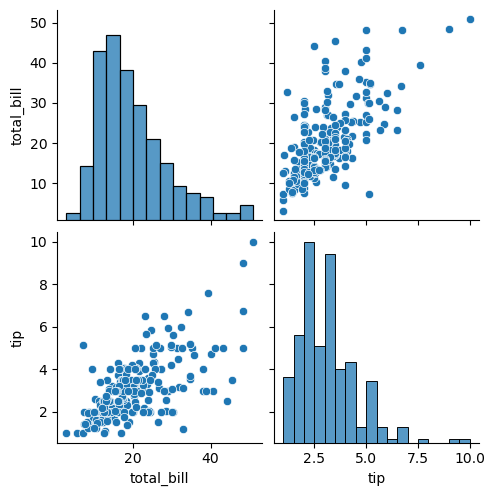

In [148]:
sns.pairplot(df[['total_bill','tip']]);

* Total Bill vs. Tip: There’s a positive correlation, indicating that higher total bills generally result in higher tips.

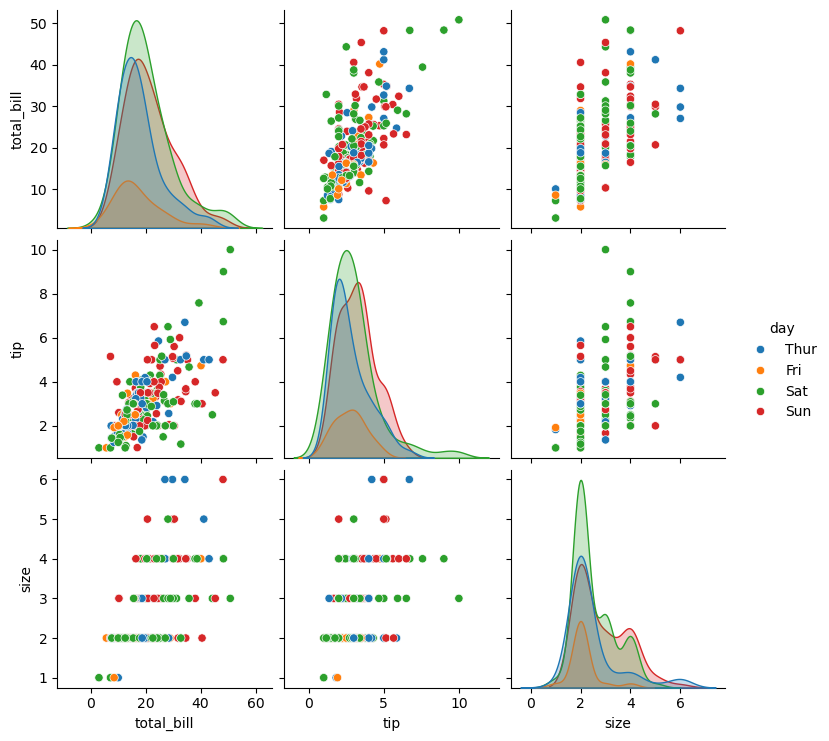

In [174]:
# Create pair plot
sns.pairplot(df, hue='day')
plt.show()

## Joint plot

* Combines scatter plots and histograms (or KDE plots) to show the relationship between two variables along with their distributions.
* Displays the scatter plot in the center with histograms or KDE plots along the margins, helping to understand the relationship and distribution of two variables.

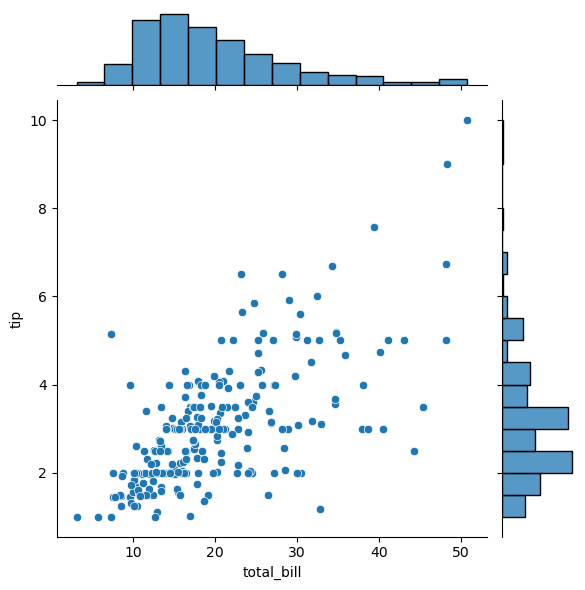

In [149]:
## Create joint plot
sns.jointplot(x='total_bill',y="tip",data=df,kind="scatter")
plt.show()

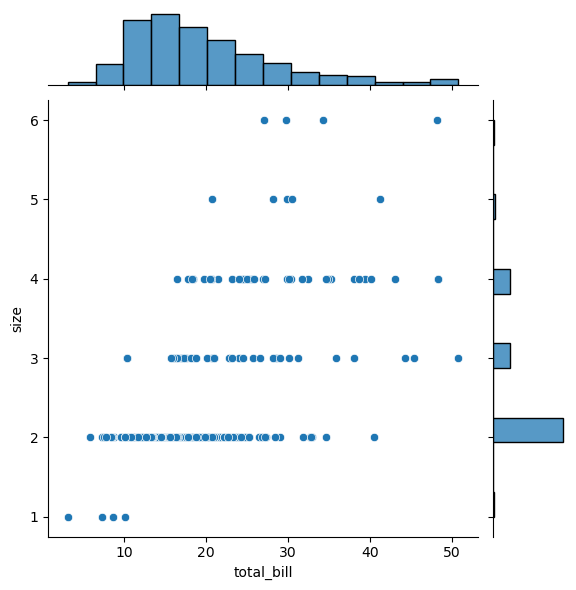

In [150]:
sns.jointplot(x='total_bill',y='size',data=df,kind="scatter")
plt.show()

## Facet Grid

* Creates multiple plots across different subsets of the data.
* Splits the data into subsets based on the values of one or more categorical variables and creates the same plot type for each subset. 
* Useful for comparing patterns across different categories.

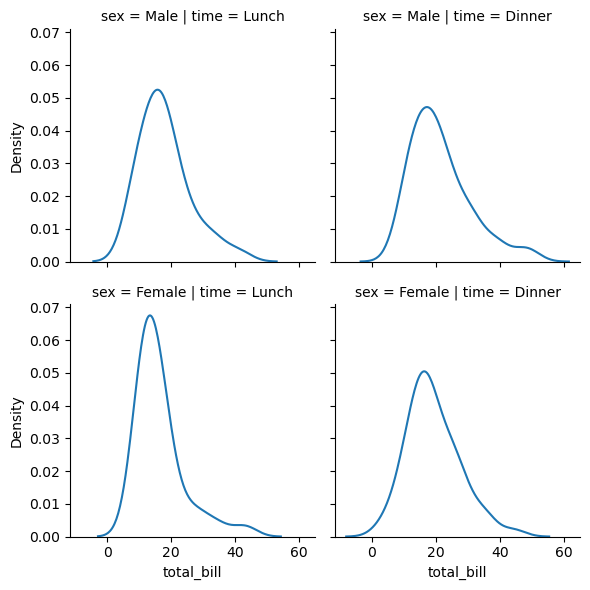

In [151]:
g=sns.FacetGrid(df,col="time",row="sex")
g.map(sns.kdeplot,'total_bill')
plt.show()

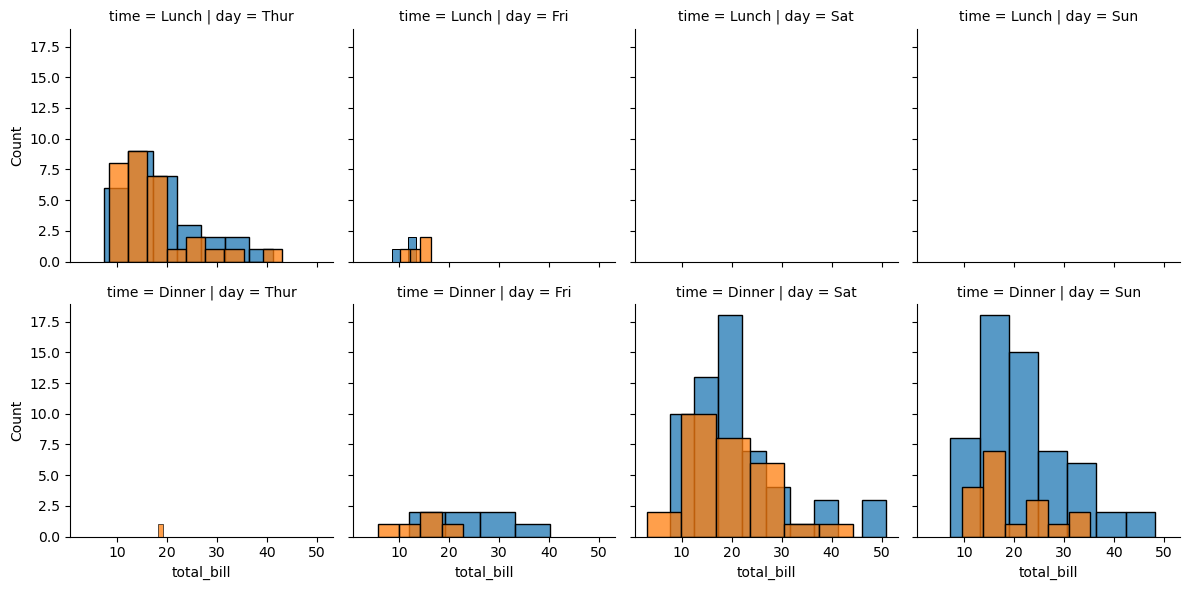

In [152]:
g=sns.FacetGrid(df,col="day",row="time",hue="sex")
g.map(sns.histplot,'total_bill')
plt.show()

# Explanation:
* Heatmap: Displays matrix data with color intensities representing values.
* Scatter Plot: Shows how two continuous variables relate to each other.
* Line Plot: Illustrates trends over a continuous variable.
* Bar Plot: Compares average values of a numerical variable across categories.
* Box Plot: Visualizes the distribution and outliers of a numerical variable by category.
* Violin Plot: Combines box plot features with a density plot to show the distribution of data.
* Pair Plot: Provides a grid of scatter plots and histograms to explore relationships between multiple variables.
* Count Plot: Shows the frequency of observations within each category.
* Joint Plot: Combines scatter plots with histograms or KDE plots for detailed relationships between two variables.
* Facet Grid: Creates multiple plots for different subsets of the data, facilitating comparison across categories.